# Telecom Churn Prediction Case Study

## Please upvote if this notebook has helped you...

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


## Business Goal

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 Recommend strategies to manage customer churn based on your observations.


### Steps To Be Followed
1. Reading and Understanding Data
2. Data Pre-processing
    - Data Cleaning
    - Missing Value Treatment
    - Outlier Treatment
3. Data Visualization
4. Data Preparation
5. Model Selection
6. Model Building and Evaluation
7. Choose Best Model
8. Choosing Important Features
9. Business Recommendations

In [341]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


### Step 1: Reading and Understanding Data

In [342]:
#Read Data
traindata = pd.read_csv("train.csv")
traindata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [343]:
traindata.shape

(69999, 172)

In [344]:
traindata.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 69999 entries, 0 to 69998

Data columns (total 172 columns):

 #    Column                    Non-Null Count  Dtype  

---   ------                    --------------  -----  

 0    id                        69999 non-null  int64  

 1    circle_id                 69999 non-null  int64  

 2    loc_og_t2o_mou            69297 non-null  float64

 3    std_og_t2o_mou            69297 non-null  float64

 4    loc_ic_t2o_mou            69297 non-null  float64

 5    last_date_of_month_6      69999 non-null  object 

 6    last_date_of_month_7      69600 non-null  object 

 7    last_date_of_month_8      69266 non-null  object 

 8    arpu_6                    69999 non-null  float64

 9    arpu_7                    69999 non-null  float64

 10   arpu_8                    69999 non-null  float64

 11   onnet_mou_6               67231 non-null  float64

 12   onnet_mou_7               67312 non-null  float64

 13   onnet_mou_8               

In [345]:
#Understanding Data
traindata.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

- id column can be dropped.
- circle id can be dropped as it has same value 109 for all records
- date columns can be dropped. Since we want to calculate churn probability for future dates, date columns are not significant
- Below columns have only 0 values and hence can be dropped
    - loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8
- Some columns have outliers and need to be treated e.g. onnet_mou_6,  onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8



In [346]:
traindata.shape

(69999, 172)

### Step 2: Missing Value Treatment

In [347]:
#Function to calculate missing value percentage in descending order
def calcmsngval(df):
    total = df.isnull().sum().sort_values(ascending=False)
    pct = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
    missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
    return missing_null_pct

In [348]:
#Calculate missing value %
missing_null_pct = calcmsngval(traindata)
missing_null_pct

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


- columns with more than 70% of missing values can be dropped.
- columns related to recharge can be imputed with 0. As we assume customer has not recharged hence there is no information available.
- columns related to revenue if missing data more than threshold then we cannot impute with any value as it will mislead. Hence better to drop such columns.

In [349]:
traindata.total_rech_data_6.astype("category")
traindata.total_rech_data_6.value_counts()

1.0     9289
2.0     3610
3.0     1457
4.0      928
5.0      560
6.0      413
7.0      310
8.0      248
9.0      174
10.0     145
11.0     114
12.0      96
14.0      47
13.0      42
15.0      24
17.0      21
16.0      21
18.0      11
20.0      11
22.0       9
19.0       7
23.0       4
24.0       4
21.0       4
25.0       4
32.0       2
40.0       2
29.0       2
35.0       2
46.0       1
28.0       1
27.0       1
26.0       1
33.0       1
61.0       1
34.0       1
Name: total_rech_data_6, dtype: int64

In [350]:

traindata.arpu_2g_6.astype("category")
traindata.arpu_2g_6.value_counts()

0.00      4610
212.17     904
122.07     377
0.01       291
63.96      283
          ... 
138.26       1
23.23        1
80.33        1
31.55        1
279.26       1
Name: arpu_2g_6, Length: 5389, dtype: int64

In [351]:
traindata.churn_probability.astype("category")
traindata.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [352]:

traindata.isd_og_mou_8.astype("category")
traindata.fb_user_8.value_counts()

1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64

In [353]:

traindata.isd_og_mou_8.astype("category")
traindata.isd_og_mou_8.value_counts()

0.00     63384
0.01        75
0.03        65
1.01        51
0.06        45
         ...  
67.40        1
16.35        1
72.93        1
3.48         1
25.49        1
Name: isd_og_mou_8, Length: 1008, dtype: int64

In [354]:
traindata.night_pck_user_6.astype("category")
traindata.night_pck_user_6.value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [355]:
traindata.fb_user_7.astype("category")
traindata.fb_user_7.value_counts()

1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64

**Observation**
- Below columns are related to service schemes. They have values either 0 or 1. Hence we cannot interpret service scheme for missing values. Hence we can categorize them with a new value -1.
    - night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8

#### Impute Missing Values

In [356]:
#pip install fancyimpute

In [357]:
def datamanipulation(df):
    #dropping unnecessary columns
    df.drop(['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1, inplace=True)
    #Impute columns related to recharge with 0
    rech_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
    'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6'
    ,'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
    'max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
    df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))
    # Impute columns related to service schemes with -1
    scheme_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8']
    df[scheme_cols] = df[scheme_cols].apply(lambda x: x.fillna(-1))
    #dropping columns with more than 70% missing values
    df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis=1, inplace=True)
    from fancyimpute import IterativeImputer
    mice_imputer = IterativeImputer()
    df_imputed = mice_imputer.fit_transform(df)
    # convert imputed numpy array to pandas dataframe
    df = pd.DataFrame(df_imputed, columns=df.columns)
    
    return df

In [358]:
#Calculate missing value %
missing_null_pct = calcmsngval(traindata)
missing_null_pct

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


In [359]:
traindata.shape

(69999, 172)

In [360]:
traindata_manipulated = datamanipulation(traindata)

In [361]:
traindata_manipulated.shape

(69999, 149)

In [362]:
traindata_manipulated.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.0,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0

In [363]:
#Calculate missing value %
missing_null_pct = calcmsngval(traindata_manipulated)
missing_null_pct

,Total,Percent
arpu_6,0,0.0
total_rech_num_7,0,0.0
total_rech_amt_6,0,0.0
total_rech_amt_7,0,0.0
total_rech_amt_8,0,0.0
max_rech_amt_6,0,0.0
max_rech_amt_7,0,0.0
max_rech_amt_8,0,0.0
last_day_rch_amt_6,0,0.0
last_day_rch_amt_7,0,0.0


There are no null values now. All null values have been treated properly.

### High Value Customer Analysis

In [364]:
train_copy = traindata_manipulated.copy()
train_copy

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.00,0.00,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.00,0.00,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.0

In [365]:
# calculate the total data recharge amount: number of recharges * average recharge amount
train_copy['total_data_rech_6'] = train_copy.total_rech_data_6 * train_copy.av_rech_amt_data_6
train_copy['total_data_rech_7'] = train_copy.total_rech_data_7 * train_copy.av_rech_amt_data_7

In [366]:
# calculate total recharge amount: call recharge amount + data recharge amount
train_copy['amt_data_6'] = train_copy.total_rech_amt_6 + train_copy.total_data_rech_6
train_copy['amt_data_7'] = train_copy.total_rech_amt_7 + train_copy.total_data_rech_7

In [367]:
# calculate average recharge done by customer
train_copy['av_amt_data_6_7'] = (train_copy.amt_data_6 + train_copy.amt_data_7)/2


In [368]:
train_copy['av_amt_data_6_7'].describe()

count    69999.000000
mean       485.760093
std        861.075228
min          0.000000
25%        128.000000
50%        275.500000
75%        553.000000
max      37762.500000
Name: av_amt_data_6_7, dtype: float64

In [369]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(train_copy.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [370]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
train_copy = train_copy.loc[train_copy.av_amt_data_6_7 >= train_copy.av_amt_data_6_7.quantile(0.7), :]
train_copy = train_copy.reset_index(drop=True)
train_copy.shape

(21013, 154)

**Observation**
- We can see there are 21013 records who have paid high recharge values and these customers definitely need to be targeted for retention in case there is any probability of them being churn.

### Step 3: Data Visualization

#### Check target variable churn probability

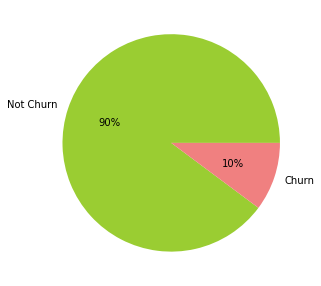

In [371]:
#plot churn_probability
plt.figure(figsize= (5,5)) 
data = traindata.churn_probability.value_counts()
labels = ['Not Churn','Churn']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

- Churn cases are very less compared to not churn cases and hence leading to class imbalance problem. This need to be taken care during modelling to get best results.

#### Checking the distribution of the tenure variable

In [372]:
traindata_manipulated['tenure'] = (traindata_manipulated['aon']/30).round(0)

In [373]:
traindata_manipulated['tenure'] = round((traindata_manipulated['aon']/30),0)

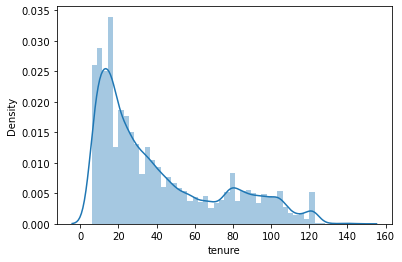

In [374]:
sns.distplot(traindata_manipulated['tenure'],bins=50)
plt.show()

### Univariate Analysis (based on AON variable)

In [375]:
ten_range = [0, 6, 12, 24, 60, 61]
ten_label = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
traindata_manipulated['tenure_range'] = pd.cut(traindata_manipulated['tenure'], ten_range, labels=ten_label)
traindata_manipulated['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

#### Plotting a bar graph for tenure

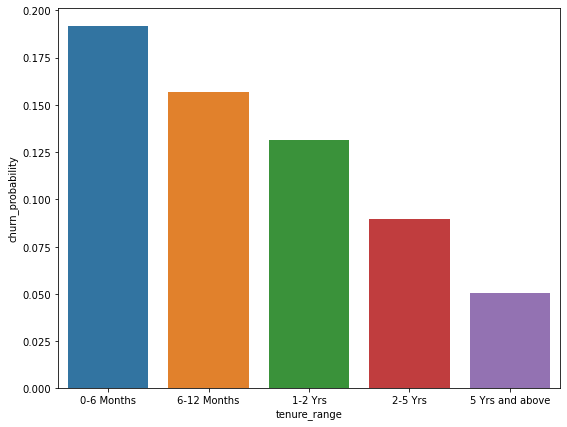

In [376]:
plt.figure(figsize=[9,7])
sns.barplot(x='tenure_range', y='churn_probability', data=traindata_manipulated, ci=None)
plt.show()

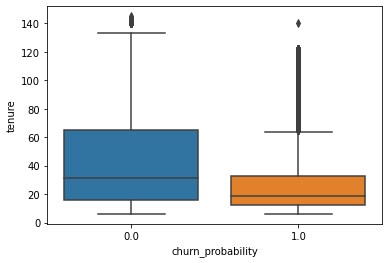

In [377]:
sns.boxplot(x = traindata_manipulated.churn_probability, y = traindata_manipulated.tenure)
plt.show()

**Observation**
- It can be seen from the above graph that the maximum churn happens in the first 6 months gradually reducing as the tenure increases, with long time customers hardly leaving the network

In [378]:
#pip install tabulate

### Univariate Analysis (Based on ARPU, recharge amount)

In [382]:
from tabulate import tabulate
def num_var_anal(col_names, scale='linear'):
    fig = plt.figure(figsize = (20,12))
    axis1=fig.add_subplot(1,3,1)
    sns.violinplot(x='churn_probability',y=col_names[0], data=traindata_manipulated, ax=axis1)
    if scale=='log':
        ply.yscale('log')
        axis1.set(ylabel = col_names[0])
    
    axis2=fig.add_subplot(1,3,2)
    sns.violinplot(x='churn_probability',y=col_names[1], data=traindata_manipulated, ax=axis2)
    if scale=='log':
        ply.yscale('log')
        axis2.set(ylabel = col_names[1])
    
    axis3=fig.add_subplot(1,3,3)
    sns.violinplot(x='churn_probability',y=col_names[2], data=traindata_manipulated, ax=axis3)
    if scale=='log':
        ply.yscale('log')
        axis3.set(ylabel = col_names[2])

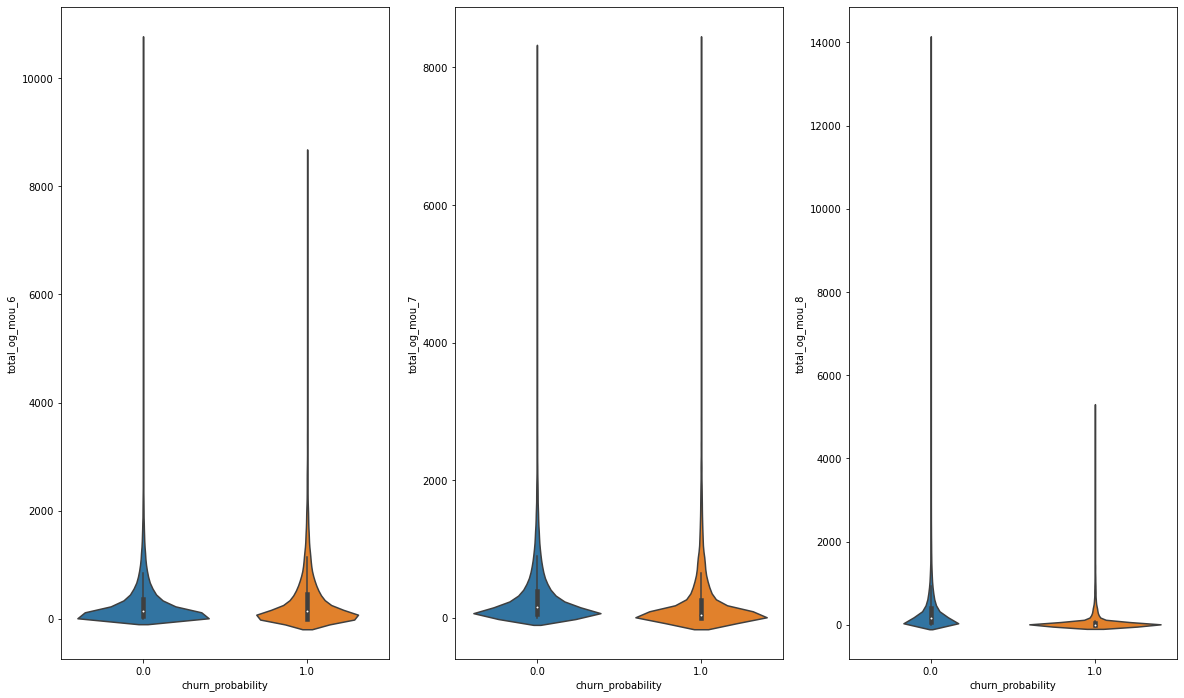

In [383]:
col_names = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_var_anal(col_names)

**Observation**
- Customers with higher outgoing calls in the 6'th month and lower calls in the 8'th month hava a high chance of churning

#### ARPU for 6'th, 7'th and 8'th month

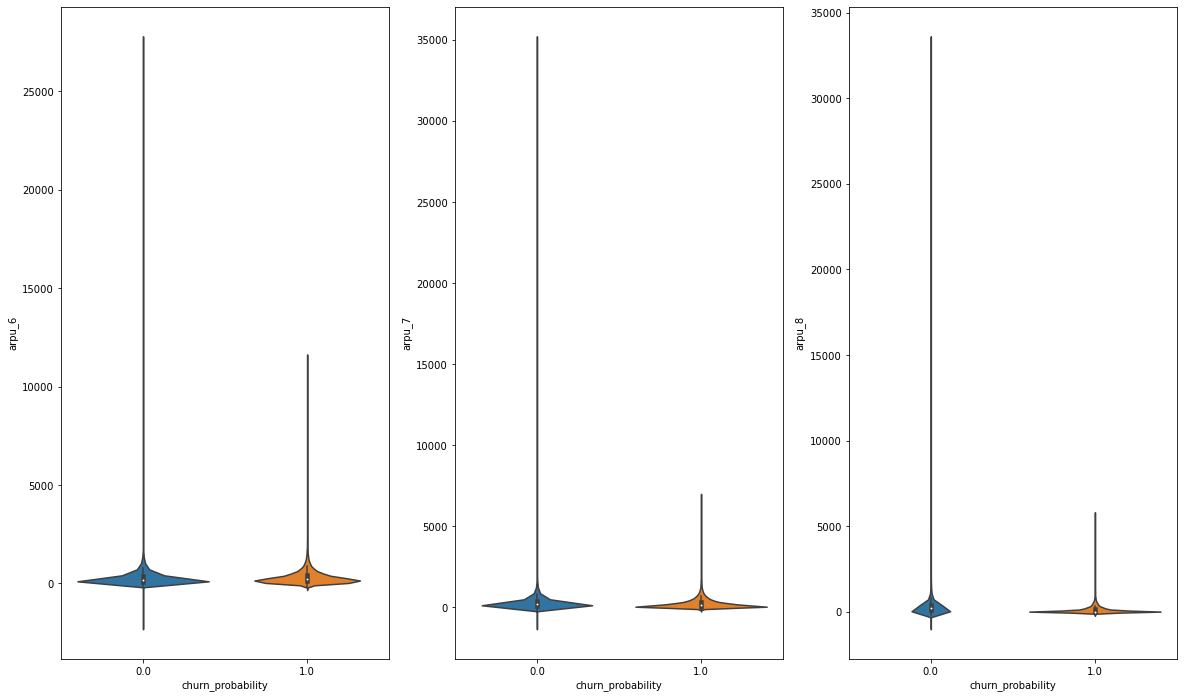

In [384]:
col_names = ['arpu_6','arpu_7','arpu_8']
num_var_anal(col_names)

**Observation**
- Here we can see that as the usage of the customer of arpu decreases, it is more likely that he will churn

<AxesSubplot:>

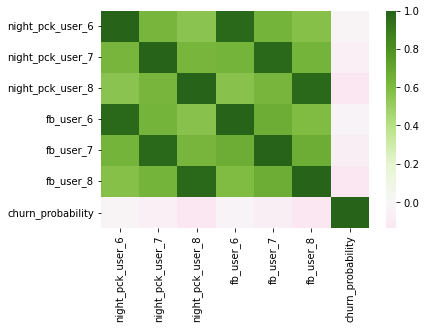

In [385]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8', 'churn_probability']
sns.heatmap(data=traindata[cols].corr(), center=0.0, cmap='PiYG')

**Observation**
- There is no correlation between scheme related features with churn. Hence these variables may not be significant in predicting churn.

In [386]:
#drop newly created columns tenure and tenure range as these were only used for analysis purpose
traindata_manipulated.drop(['tenure','tenure_range'],axis=1, inplace=True)

## Outlier treatment

In [387]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
traindata_manipulated.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

In [388]:
#Looking at outliers from 0.9 to 1.0
traindata_manipulated.describe(percentiles=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

#### After looking at the above values we can cap the values of the outliers at 99% values

In [389]:
# Columns with outliers 
out99 = traindata_manipulated.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :

 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'

 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'

 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'

 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'

 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'

 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'

 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'

 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'

 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'

 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'

 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'

 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'

 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'

 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'

 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_i

In [390]:
# Fixing the outliers to 99th percentile values
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = traindata_manipulated[col].quantile(0.99)
    condition = traindata_manipulated[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : traindata_manipulated.loc[condition,col].shape[0] }, ignore_index=True)
    traindata_manipulated.loc[condition, col] = out_threshold
out_treat


,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1400.276640,700
1,arpu_7,1414.891380,700
2,arpu_8,1445.054800,700
3,onnet_mou_6,1429.040400,700
4,onnet_mou_7,1461.342200,700
5,onnet_mou_8,1448.891000,700
6,offnet_mou_6,1520.310000,699
7,offnet_mou_7,1517.838600,700
8,offnet_mou_8,1492.232400,700
9,roam_ic_mou_6,214.681200,700


In [391]:
traindata_manipulated.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

All outliers have been treated properly.

### Step 4: Data Preparation

#### Prepare X_train and y_train

In [392]:
y_train=traindata_manipulated.pop("churn_probability")
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churn_probability, dtype: float64

In [393]:
X_train=traindata_manipulated
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.0000,0.00,0.0000,0.00,0.00,0.0000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.000,0.0000,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.000,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0000,0.00,22.01,23.6404,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.350,1.6600,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.000,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.0000,0.00,0.0000,2.14,0.00,0.0000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.000,0.0000,0.00,94.38,31.34,30.01,11.69,

#### Feature Scaling

In [394]:
#Rescaling the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [395]:
X_train

array([[0.62585269, 0.50902934, 0.39874099, ..., 0.        , 0.        ,
        0.        ],
       [0.61730469, 0.52225788, 0.41355824, ..., 0.        , 0.        ,
        0.        ],
       [0.63392296, 0.51500692, 0.39559275, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71899626, 0.57238976, 0.51261411, ..., 0.        , 0.        ,
        0.        ],
       [0.68250719, 0.56759794, 0.45626625, ..., 0.54151118, 1.        ,
        0.83396184],
       [0.66329257, 0.49268907, 0.46584396, ..., 0.        , 0.        ,
        0.        ]])

### Test Dataset Preparation

In [396]:
#Read Data
testdata = pd.read_csv("test.csv")
testdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [397]:
testdata.shape

(30000, 171)

In [398]:
#Extract id as this will be required for output file
X_test_id = testdata.id

In [399]:
X_test_id

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [400]:
#Data manipulation on test dataset

testdata_manipulated = datamanipulation(testdata)

In [404]:
#Feature scaling on test dataset
X_test = scaler.transform(testdata_manipulated)
X_test = pd.DataFrame(X_test)

In [405]:
X_test.shape

(30000, 148)

In [406]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0.642416,0.501014,0.422547,0.108546,0.289253,0.356376,0.039571,0.214365,0.185739,0.135578,0.273733,0.198168,0.000000,0.418713,0.396911,0.197918,0.217791,0.227436,0.024706,0.015244,0.011669,0.000000,0.248536,0.000000,0.237519,0.534468,0.368974,0.041424,0.060306,0.050624,0.005693,0.000000,0.001642,0.034189,0.006133,0.021766,0.0,0.0,0.0,0.026354,0.004060,0.015129,0.939282,0.931152,0.942743,0.000000,0.000000,0.000509,0.000000,0.0,0.0,0.041125,0.023022,0.025833,0.165314,0.188772,0.166428,0.013636,0.006194,0.012740,0.001607,0.000000,0.000000,0.035921,0.036781,0.028103,0.145059,0.136250,0.138439,0.001360,0.003793,0.015853,0.0,0.0,0.00000,0.0,0.0,0.0,0.001419,0.002525,0.011599,0.030548,0.031518,0.026794,0.998541,0.995501,0.995493,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.142857,0.142857,0.114286,0.061200,0.052570,0.035170,0.090909,0.054545,0.054545,0.075,0.075377,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363724,0.000000,0.000000,0.000000
1,0.730497,0.667485,0.546529,0.136446,0.299600,0.354900,0.312002,0.526191,0.386935,0.135578,0.273733,0.198168,0.000000,0.418713,0.396911,0.277515,0.250747,0.225495,0.645395,0.837197,0.526571,0.013673,0.000000,0.000000,0.237519,0.534468,0.368172,0.486883,0.583182,0.379907,0.000000,0.000000,0.000000,0.000000,0.018973,0.014560,0.0,0.0,0.0,0.000000,0.012559,0.009392,0.939282,0.931152,0.950059,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.245955,0.291377,0.185295,0.146020,0.168920,0.128851,0.213946,0.165016,0.247051,0.009208,0.000000,0.000000,0.159922,0.130200,0.167167,0.145059,0.136250,0.138439,0.000000,0.045627,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000495,0.030373,0.000694,0.216928,0.245747,0.208129,0.990664,0.990227,0.989431,0.720397,1.055087,0.556775,0.0,0.0,0.000000,0.142857,0.114286,0.142857,0.297085,0.292056,0.293080,0.454545,0.454545,0.454545,0.625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566033,0.000000,0.000000,0.000000
2,0.707451,0.637652,0.707714,0.093081,0.283152,0.349736,0.011169,0.221583,0.191443,0.227423,0.775149,0.334152,0.086154,0.562779,0.556023,0.158804,0.186013,0.193932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237519,0.534468,0.368172,0.003624,0.020988,0.024267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.939282,0.931152,0.942743,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108719,0.118496,0.123787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145059,0.136250,0.138439,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000495,0.000000,0.000694,0.000000,0.000000,0.000000,0.990664,0.990227,0.989431,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.171429,0.257143,0.142857,0.297085,0.584112,0.586160,0.545455,0.909091,0.909091,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023334,0.428489,0.604658,0.203523
3,0.629207,0.540228,0.405798,0.091658,0.280341,0.345944,0.026337,0.305769,0.179694,0.135578,0.273733,0.198168,0.000000,0.418713,0.396911,0.167152,0.186013,0.193932,0.004006,0.138035,0.028627,0.000000,0.000000,0.044024,0.237519,0.658525,0.368172,0.010883,0.107706,0.044740,0.000000,0.001717,0.

## Step 5: Model Selection

- The goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.
- This problem falls under classification problem hence we have to use classification model.
- For this case study we have used below classification models
    - Logistic Regression
    - Random Forest Classifier
- Hyperparameter tuning has been done to take care of overfitting.
- Training dataset has 172 columns hence we have used PCA as dimensionality reduction technique.
- There is class imbalance in the target variable churn_probability hence we have handled class imbalance during the model building.

## Step 6: Building and Evaluation of Different Models

## Model 1 - PCA with Logistic Regression

### Using PCA for Feature Selection

In [407]:
#Instantiate
pca=PCA()

In [408]:
#Fit 
pca.fit(X_train)

PCA()

In [409]:
#Check components from PCA
pca.components_

array([[ 2.05039186e-02,  3.03756022e-02,  3.41736633e-02, ...,
         7.89481465e-02,  7.64591655e-02,  7.03800525e-02],
       [ 6.79842367e-02,  1.01266064e-01,  1.10991788e-01, ...,
         7.50490030e-03,  6.07947578e-03,  3.74833712e-03],
       [ 2.98794219e-02,  5.39977614e-02,  5.61566125e-02, ...,
        -2.88955885e-02, -3.00028930e-02, -3.11737305e-02],
       ...,
       [-0.00000000e+00, -1.67684465e-17, -2.22745200e-17, ...,
         8.00683719e-17, -7.26873380e-17, -4.71978103e-17],
       [-0.00000000e+00,  6.67616471e-17, -1.49257722e-16, ...,
         9.03391592e-17, -3.61409379e-17, -4.55110300e-17],
       [-0.00000000e+00,  1.31240731e-17, -7.37200287e-17, ...,
        -1.04958855e-16,  2.72525646e-17,  8.33789180e-17]])

In [410]:
#Checking explain variance ratio for each component
pca.explained_variance_ratio_

array([2.56554017e-01, 1.02061395e-01, 6.04243831e-02, 4.80550213e-02,
       4.22074131e-02, 3.78495205e-02, 3.22358954e-02, 2.80508424e-02,
       2.61863458e-02, 1.98673571e-02, 1.91451234e-02, 1.63354014e-02,
       1.34393693e-02, 1.31618033e-02, 1.23603931e-02, 1.14583105e-02,
       9.98730123e-03, 9.67057104e-03, 9.28392405e-03, 9.07158966e-03,
       8.52697513e-03, 8.34876151e-03, 8.32788453e-03, 8.08182085e-03,
       7.86535846e-03, 7.61854845e-03, 7.43691915e-03, 6.63470013e-03,
       6.61284101e-03, 6.16296058e-03, 5.61480377e-03, 5.41050191e-03,
       5.10914798e-03, 4.74513427e-03, 4.63955716e-03, 4.56436599e-03,
       4.46990786e-03, 4.40836424e-03, 4.30862992e-03, 4.11557459e-03,
       4.04758606e-03, 3.95521037e-03, 3.55554991e-03, 3.48135209e-03,
       3.34901656e-03, 3.09945010e-03, 2.91506248e-03, 2.83004942e-03,
       2.78752400e-03, 2.71947799e-03, 2.52941950e-03, 2.35806090e-03,
       2.26195993e-03, 2.19425191e-03, 2.08927088e-03, 2.01904198e-03,
      

In [411]:
#Consider features contributing to 95% variance
pca2=PCA(0.95)

In [412]:
traindata_pca2=pca2.fit_transform(X_train)

In [413]:
traindata_pca2.shape

(69999, 58)

In [414]:
pca2.explained_variance_ratio_

array([0.25655402, 0.10206139, 0.06042438, 0.04805502, 0.04220741,
       0.03784952, 0.0322359 , 0.02805084, 0.02618635, 0.01986736,
       0.01914512, 0.0163354 , 0.01343937, 0.0131618 , 0.01236039,
       0.01145831, 0.0099873 , 0.00967057, 0.00928392, 0.00907159,
       0.00852698, 0.00834876, 0.00832788, 0.00808182, 0.00786536,
       0.00761855, 0.00743692, 0.0066347 , 0.00661284, 0.00616296,
       0.0056148 , 0.0054105 , 0.00510915, 0.00474513, 0.00463956,
       0.00456437, 0.00446991, 0.00440836, 0.00430863, 0.00411557,
       0.00404759, 0.00395521, 0.00355555, 0.00348135, 0.00334902,
       0.00309945, 0.00291506, 0.00283005, 0.00278752, 0.00271948,
       0.00252942, 0.00235806, 0.00226196, 0.00219425, 0.00208927,
       0.00201904, 0.00199304, 0.00192193])

### Apply Logistic regression on Principal Components

In [415]:
def printmetrics(y, y_pred):
   
        print("Train Set Performance")
        print("Confusion Matrix")
        print(metrics.confusion_matrix(y, y_pred))
        print("Accuracy Score : ",round(accuracy_score(y, y_pred),2))
        print("Precision Score : ", round(precision_score(y,y_pred),2))
        print("Recall Score : ", round(recall_score(y,y_pred),2))
        print("ROC AUC Score : ", round(roc_auc_score(y,y_pred),2))
        print("f1_Score : ", round(f1_score(y,y_pred),2))
   

In [416]:
#Build a default model
logreg = LogisticRegression(class_weight='balanced', random_state=4)

In [417]:
model1 = logreg.fit(traindata_pca2, y_train)

In [418]:
#print accuracy score
model1.score(traindata_pca2, y_train)

0.8616980242574894

In [419]:
#predict on train dataset
y_train_pca2_pred = model1.predict(traindata_pca2)
y_train_pca2_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [420]:
#print metrics accuracy, precision, recall, ROC AUC curve and f1_score
printmetrics(y_train, y_train_pca2_pred)

Train Set Performance

Confusion Matrix

[[54460  8407]

 [ 1274  5858]]

Accuracy Score :  0.86

Precision Score :  0.41

Recall Score :  0.82

ROC AUC Score :  0.84

f1_Score :  0.55


### Model Evaluation on Test Data

In [421]:
def testoutput(y_pred):
    #Create dataframe as required in the output with id and churn_probability columns
    data = {'id':[],'churn_probability':[]}
    solution = pd.DataFrame(data)
    #assign values of id and churn prediction 
    solution.id = X_test_id
    solution.churn_probability = y_pred
    solution.churn_probability = solution.churn_probability.astype(np.int64)
    #write output to csv file
    solution.to_csv('submission.csv', index=False)
    print("File created successfully.")

In [422]:
#Apply PCA transfomration on test dataset
X_test_pca2=pca2.transform(X_test)
# prediction of churn on test data
y_test_pca2_pred = model1.predict(X_test_pca2)

In [423]:
 #Write output to submision.csv file which will be uploaded on kaggle to get the accuracy score of test dataset performance.
testoutput(y_test_pca2_pred)

File created successfully.


**Observation**
- Accuracy score on kaggle platform is 0.848

## Model 2 - PCA  and Logistic Regression using Cross Validation

In [424]:
# observe class imbalance
y_train.value_counts()/y_train.shape

0.0    0.898113
1.0    0.101887
Name: churn_probability, dtype: float64

In [425]:
logreg2=LogisticRegression(class_weight = {0:0.1, 1: 0.9})

In [426]:
print(logreg2.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [427]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#hyperparameter tuning
params={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty': ['l1', 'l2']}
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model2 = GridSearchCV(estimator=logreg2, param_grid=params, cv=folds, scoring = scoring, refit="accuracy" )
model2.fit(traindata_pca2, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [428]:
# observe cross validation results
pd.DataFrame(model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
0,0.020865,0.003906,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.343731,0.021633,0.045312,0.006168,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.863071,0.864571,0.867429,0.863214,0.865705,0.864798,0.001630,1,0.412602,0.416131,0.421227,0.413536,0.418638,0.416427,0.003194,1,0.812763,0.817672,0.803784,0.817800,0.819074,0.814219,0.005645,8,0.547344,0.551561,0.552771,0.549306,0.554080,0.551012,0.002416,1
2,0.020978,0.004084,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,0.387147,0.024297,0.042940,0.007663,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.858571,0.859786,0.863857,0.858357,0.860419,0.860198,0.001982,2,0.404152,0.406997,0.414188,0.404729,0.407886,0.407590,0.003577,2,0.819074,0.823983,0.810091,0.827610,0.819776,0.820107,0.005879,7,0.541242,0.544864,0.548127,0.543613,0.544734,0.544516,0.002225,2
4,0.023562,0.003439,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,0.414437,0.020051,0.047306,0.001529,1,l2,"{'C': 1, 'penalty': 'l2'}",0.857143,0.858857,0.862429,0.857500,0.858918,0.858969,0.001870,3,0.401510,0.405238,0.411305,0.403270,0.404919,0.405248,0.003307,3,0.820477,0.824684,0.810792,0.829713,0.819776,0.821088,0.006252,6,0.539171,0.543438,0.545755,0.542746,0.542082,0.542638,0.002131,3
6,0.019225,0.003921,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,0.411517,0.023994,0.043181,0.003093,2,l2,"{'C': 2, 'penalty': 'l2'}",0.856786,0.858357,0.861643,0.856571,0.858918,0.858455,0.001829,4,0.400958,0.404263,0.409830,0.401492,0.405247,0.404358,0.003179,4,0.821879,0.824684,0.812193,0.829713,0.823282,0.822350,0.005725,1,0.538974,0.542561,0.544771,0.541133,0.543141,0.542116,0.001956,4
8,0.022365,0.005449,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.413717,0.023183,0.047968,0.002610,3,l2,"{'C': 3, 'penalty': 'l2'}",0.856643,0.858286,0.861714,0.856286,0.858561,0.858298,0.001925,5,0.400684,0.404124,0.409975,0.400948,0.404549,0.404056,0.003356,5,0.821879,0.824684,0.812193,0.829713,0.823282,0.822350,0.005725,1,0.538727,0.542435,0.544899,0.540639,0.542514,0.541843,0.002064,5


In [429]:
# print best hyperparameters
print("Best Accuracy: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

Best Accuracy:  0.8647980814956171

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


Below are the metrics based on best test score from cv_results_

- **Accuracy  >>	Best Score 0.864 >>   Best Params {'C': 0.1, 'penalty': 'l2'}**
- **Precision >>	Best Score 0.416 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}**
- **Recall    >>	Best Score 0.822 >>	  Best Params {'C': 2, 'penalty': 'l2'}**
- **f1 Score  >>	Best Score 0.551 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}**


### Model Evaluation on Test Data

In [430]:
# prediction of churn on test data
y_test2_pred = model2.predict(X_test_pca2)

In [431]:
testoutput(y_test2_pred)

File created successfully.


**Observation**
- Accuracy of test data set after uploading on kaggle platform is 0.851

## Model 3 - PCA and Random Forest


In [433]:
# The class weight is used to handle class imbalance to adjust the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameters
#params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}
params = {"criterion": ['gini', 'entropy'], "max_depth": [2,5,10,15,20,25], 'n_estimators': [10, 30, 50, 100, 200]}
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model3 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring=scoring, refit='accuracy', n_jobs=-1, verbose=1)

In [434]:
# fit model
model3.fit(traindata_pca2, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20, 25],
                         'n_estimators': [10, 30, 50, 100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [449]:
# observe cross validation results
pd.DataFrame(model3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
0,1.371105,0.548168,0.740119,0.258555,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.898429,0.829357,0.879000,0.846571,0.856704,0.862012,0.024280,58,0.501418,0.328587,0.429551,0.353396,0.370651,0.396721,0.062030,58,0.495792,0.647265,0.570427,0.608970,0.582749,0.581041,0.050097,36,0.498590,0.435891,0.490066,0.447247,0.453108,0.464980,0.024741,59
1,1.937517,0.380659,1.425802,0.680237,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.837214,0.862643,0.868500,0.853643,0.879920,0.860384,0.014387,59,0.345639,0.389112,0.395137,0.374089,0.434982,0.387792,0.029145,59,0.669705,0.611501,0.546601,0.647512,0.598177,0.614699,0.042480,21,0.455956,0.475593,0.458689,0.474211,0.503691,0.473628,0.016991,58
2,6.075145,1.241163,2.136289,0.349080,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.847857,0.866214,0.868929,0.888786,0.875348,0.869427,0.013309,57,0.351602,0.397618,0.400391,0.461263,0.418581,0.405891,0.035421,57,0.584853,0.608696,0.574632,0.542397,0.575035,0.577122,0.021322,37,0.439179,0.481020,0.471942,0.498551,0.484490,0.475036,0.019867,57
3,18.291548,1.359737,3.589489,0.316057,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.885429,0.877786,0.873857,0.853857,0.887921,0.875770,0.012073,52,0.455051,0.427921,0.414177,0.369903,0.460211,0.425453,0.032567,52,0.631837,0.593268,0.573231,0.616678,0.579944,0.598992,0.022140,23,0.529066,0.497208,0.480894,0.462428,0.513186,0.496557,0.023426,51
4,33.610545,1.364190,2.875454,0.396698,gini,2,200,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.876714,0.867643,0.881786,0.867643,0.879849,0.874727,0.006006,53,0.426829,0.401203,0.438378,0.403533,0.432984,0.420586,0.015335,54,0.613604,0.607994,0.568325,0.624387,0.579944,0.598851,0.021179,24,0.503452,0.483412,0.494965,0.490234,0.495803,0.493573,0.006617,53
5,8.623167,1.128311,3.279410,0.616838,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.879214,0.868500,0.876000,0.867929,0.869919,0.872312,0.004488,55,0.440663,0.417033,0.432680,0.415869,0.418084,0.424866,0.009989,53,0.690042,0.731417,0.695865,0.730904,0.706872,0.711020,0.017311,5,0.537852,0.531194,0.533584,0.530114,0.525410,0.531631,0.004091,50
6,12.616193,0.302420,2.376533,0.238060,gini,5,30,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.889071,0.893357,0.882071,0.883071,0.888706,0.887256,0.004172,48,0.470588,0.483570,0.448671,0.453209,0.469388,0.465085,0.012657,48,0.712482,0.691445,0.686055,0.712684,0.709677,0.702469,0.011380,10,0.566806,0.569120,0.542533,0.554072,0.565047,0.559516,0.009940,47
7,21.801058,0.922245,3.093924,0.550662,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.890500,0.889571,0.889929,0.889786,0.895778,0.891113,0.002353,42,0.475357,0.471671,0.472753,0.472744,0.491900,0.476885,0.007605,42,0.723703,0.700561,0.693062,0.704975,0.702665,0.704993,0.010173,7,0.573812,0.563770,0.562092,0.565963,0.578689,0.568865,0.006344,45
8,43.870618,1.197453,4.071665,0.718718,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.891000,0.889714,0.891143,0.887786,0.893350,0.890598,0.001829,43,0.477043,0.472507,0.476938,0.467123,0.484176,0.475557,0.005636,43,0.728612,0.711080,0.702873,0.716889,0.718794,0.715649,0.008527,1,0.576582,0.567749,0.568272,0.565

In [435]:
# print best hyperparameters
print("Best Accuracy: ", model3.best_score_)
print("Best hyperparameters: ", model3.best_params_)

Best Accuracy:  0.9334418897268172

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}


Below are the metrics based on best test score from cv_results_

- **Accuracy  >> 	Best Score 0.933 >>	Best Params {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}**
- **Precision >>	Best Score 0.811 >>	Best Params {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 200}**
- **Recall    >>	Best Score 0.715 >>	Best Params {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}**
- **f1 Score  >>	Best Score 0.627 >>	Best Params {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}**

In [436]:
model3_best = model3.best_estimator_

### Model Evaluation on Test Data

In [437]:
# prediction of churn on test data
y_test3_pred = model3_best.predict(X_test_pca2)

In [438]:
testoutput(y_test3_pred)

File created successfully.


**Observation**
- Accuracy of test data set after uploading on kaggle platform is 0.933

## Step 7: Choose Best Model

We need to choose best model as per highest accuracy as mentioned in problem statement. Below are the models with their accuracies on the test data set provided:

- **Model 1	>> Logistic Regression with PCA	                     >> Accuracy = 0.848**
- **Model 2	>> Logistic Regression with Cross Validation and PCA >>	Accuracy = 0.851**
- **Model 3	>> Random Forest with Cross Validation and PCA	     >> Accuracy = 0.933**

Hence we will choose Model 3 Random Forest with Cross Validation and PCA as our final model as it has given highest accuracy amongst 3 which is 0.933 on test data set.

Depending on the situation, models based on best score on other metrics like precision, recall and f1 score can be chosen.

If we would like to completely avoid any situations where the customer is going to be churn, but our model classifies as him not churning then we should select model based on highest recall score.

For the cases where the customer is not churning and our model predicts the opposite, we would also like to avoid giving discounts to customers not churning then we should select model based on highest precision score.

For the cases where we need good precision as well as good recall then we should select model based on highest f1 score.


## Step 8: Choose Important Features

### Create Random Forest model on train data to extract top important features

In [439]:
#Calculate maximum features to be considered to build model
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

12


In [441]:
#Create random forest model to get the top features
model_features = RandomForestClassifier(n_estimators=50, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [442]:
model_features.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       n_estimators=50, oob_score=True, random_state=4,
                       verbose=1)

In [443]:
model_features.oob_score_

0.9458992271318162

### Feature Importance

In [444]:
X_train_new = pd.DataFrame(X_train, columns=traindata_manipulated.columns)
X_train_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.625853,0.509029,0.398741,0.119265,0.340619,0.346526,0.021206,0.248484,0.167581,0.135578,0.273733,0.198168,0.000000,0.418713,0.396911,0.162310,0.186013,0.194378,0.007209,0.022453,0.003252,0.000000,0.000000,0.000000,0.237519,0.534468,0.368172,0.010242,0.035093,0.026605,0.038236,0.098845,0.000809,0.015252,0.064370,0.000000,0.000000,0.0,0.0,0.035058,0.108354,0.000537,0.939282,0.931152,0.942743,0.161959,0.010551,0.000000,0.055635,0.0,0.0,0.036326,0.097416,0.001618,0.113253,0.125382,0.138900,0.001109,0.028445,0.022605,0.000000,0.000000,0.000000,0.002869,0.021601,0.022039,0.145059,0.181031,0.139678,0.028186,0.072798,0.054646,0.000000,0.0,0.000000,0.0,0.0,0.0,0.019634,0.066961,0.038838,0.008667,0.038377,0.029971,0.990664,0.990227,0.999689,0.000000,0.0,0.000000,0.077187,0.042565,0.000000,0.085714,0.057143,0.057143,0.045751,0.037967,0.005862,0.118182,0.118182,0.018182,0.1625,0.163317,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427712,0.000000,0.0,0.000000
1,0.617305,0.522258,0.413558,0.088271,0.279275,0.345944,0.000000,0.211102,0.183538,0.135578,0.273733,0.198168,0.000000,0.418713,0.396911,0.158804,0.186013,0.193932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237519,0.976297,1.000000,0.003624,0.020988,0.024267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.939282,0.931152,0.942743,0.000000,0.514651,0.537612,0.000000,0.0,0.0,0.000000,0.013504,0.014116,0.111854,0.154214,0.144215,0.001883,0.025206,0.014825,0.002163,0.009724,0.022187,0.003028,0.034408,0.022324,0.145059,0.136250,0.138439,0.000000,0.000000,0.000000,0.000000,0.0,0.00

In [445]:
# features
features = X_train_new.columns

# feature_importance
importance = model_features.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features based on importance
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,7.309886
1,loc_ic_t2t_mou_8,7.232847
2,loc_og_mou_8,5.821823
3,roam_og_mou_8,4.535714
4,roam_ic_mou_8,4.377889
5,loc_ic_mou_8,4.008652
6,loc_og_t2t_mou_8,3.936893
7,total_og_mou_8,3.710399
8,total_rech_amt_8,2.800768
9,loc_ic_t2m_mou_8,2.578713


### Extract Top 20 Features

In [446]:
# extract top 'n' features
n = 20
top_features = feature_importance.variables[0:n]

In [447]:
top_features

0         total_ic_mou_8
1       loc_ic_t2t_mou_8
2           loc_og_mou_8
3          roam_og_mou_8
4          roam_ic_mou_8
5           loc_ic_mou_8
6       loc_og_t2t_mou_8
7         total_og_mou_8
8       total_rech_amt_8
9       loc_ic_t2m_mou_8
10    last_day_rch_amt_8
11                arpu_8
12           onnet_mou_8
13          std_ic_mou_8
14          isd_ic_mou_8
15        max_rech_amt_8
16          spl_ic_mou_8
17        total_ic_mou_7
18      loc_og_t2m_mou_8
19      loc_ic_t2t_mou_7
Name: variables, dtype: object

<AxesSubplot:>

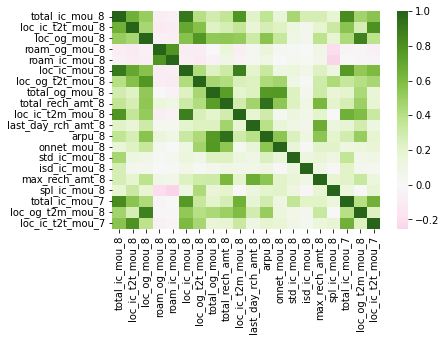

In [448]:
# plotting feature correlation
sns.heatmap(data=X_train_new[top_features].corr(), center=0.0, cmap='PiYG')

**Observation**
- These variables are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
- Below is the list of top 20 predictors as given by model
    - 1 -      loc_ic_t2t_mou_8
    - 2 -          loc_og_mou_8
    - 3 -         roam_og_mou_8
    - 4 -         roam_ic_mou_8
    - 5 -          loc_ic_mou_8
    - 6 -      loc_og_t2t_mou_8
    - 7 -        total_og_mou_8
    - 8 -      total_rech_amt_8
    - 9 -      loc_ic_t2m_mou_8
    - 10 -   last_day_rch_amt_8
    - 11 -               arpu_8
    - 12 -          onnet_mou_8
    - 13 -         std_ic_mou_8
    - 14 -         isd_ic_mou_8
    - 15 -       max_rech_amt_8
    - 16 -         spl_ic_mou_8
    - 17 -       total_ic_mou_7
    - 18 -     loc_og_t2m_mou_8
    - 19 -     loc_ic_t2t_mou_7

## Step 9: Business Recommendations to Manage Customer Churn

- The prediction can be used to take steps towards retaining customer paying high values incase there is any probability of them being churn.
- Maximum churn happens in first 6 months hence such customers should be focused.
- Customers with lower outgoing calls in 8th month are at higher risk of being churn. Hence such customers need to be given attention.
- Customers with low arpu(average revenue per user) should be focused as there is high possibility for them being churn 
- Company can give more discounts or some special offers or launch new schemes to retain customers at risk of being churn.
- roaming usage incoming and outgoing seems to be important predictors of churn. Company can think of lowering rates for roaming usage.
- local incoming calls within same operator is the most important predictor of being churn and company can make this service free to compete with other competitors and retain customers.
- Special packages can be rolled out for local outgoing calls which do not affect minutes of usage.
- Company can also think on revised rated of STD and ISD calls or special packages can be rolled out. 
- total recharge amount is also one of the good indicator of churn and company can provide discounts on recharge.

